In [6]:
from sklearn import tree

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, f1_score, mean_squared_error, mean_absolute_error, r2_score

In [7]:
X_train = pd.read_csv('X_train.csv', index_col=0)
y_train = pd.read_csv('y_train.csv', index_col=0)

X_test = pd.read_csv('X_test.csv', index_col=0)
y_test = pd.read_csv('y_test.csv', index_col=0)

In [16]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
# Initialize Decision Tree Regression model
model = tree.DecisionTreeRegressor(max_depth=4, random_state=156)

sfs_backward = SFS(model, 
                   k_features=10, 
                   forward=False, 
                   floating=False, 
                   scoring='neg_mean_squared_error',
                   cv=5)

sfs_backward = sfs_backward.fit(X_train, y_train)

# Selected Features
selected_features_backward = X_train.columns[list(sfs_backward.k_feature_idx_)]
print('Selected features in Backward Selection:', selected_features_backward)
print('Score',sfs_backward.k_score_)

pd.DataFrame.from_dict(sfs_backward.get_metric_dict()).T

Selected features in Backward Selection: Index(['PM2.5', 'CLU50_1', 'PM10', 'NO2', 'O3', 'CO', 'Disel', 'Air_EQI',
       'Water_EQI', 'smoking_data'],
      dtype='object')
Score -148.72348946406038


,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
19,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[-179.3861489619939, -142.2260279837672, -121....",-151.750317,"(PM2.5, Land_EQI, Sociod_EQI, Built_EQI, CLU50...",24.942989,19.406493,9.703246
18,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[-172.8640925073269, -148.0737133743247, -124....",-150.593038,"(PM2.5, Land_EQI, Sociod_EQI, Built_EQI, CLU50...",19.845711,15.440638,7.720319
17,"(0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[-172.8640925073269, -148.07371337432483, -121...",-149.940768,"(PM2.5, Sociod_EQI, Built_EQI, CLU50_1, PM10, ...",21.452316,16.690631,8.345315
16,"(0, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 1...","[-173.31450612369727, -146.18463923856066, -12...",-149.653036,"(PM2.5, Sociod_EQI, Built_EQI, CLU50_1, PM10, ...",21.690191,16.875706,8.437853
15,"(0, 2, 3, 4, 5, 7, 8, 9, 10, 11, 13, 14, 15, 1...","[-173.320350565226, -146.18463923856066, -118....",-149.647828,"(PM2.5, Sociod_EQI, Built_EQI, CLU50_1, PM10, ...",23.280015,18.112642,9.056321
14,"(0, 2, 3, 4, 5, 7, 8, 9, 11, 13, 14, 15, 16, 18)","[-172.0630005353931, -146.18463923856072, -118...",-149.39479,"(PM2.5, Sociod_EQI, Built_EQI, CLU50_1, PM10, ...",22.862264,17.787618,8.893809
13,"(0, 2, 4, 5, 7, 8, 9, 11, 13, 14, 15, 16, 18)","[-172.06300053539312, -146.04459678302422, -11...",-149.294703,"(PM2.5, Sociod_EQI, CLU50_1, PM10, NO2, O3, CO...",22.843677,17.773157,8.886578
12,"(0, 2, 4, 5, 7, 8, 9, 11, 13, 14, 16, 18)","[-172.06300053539306, -146.04459678302428, -11...",-149.294703,"(PM2.5, Sociod_EQI, CLU50_1, PM10, NO2, O3, CO...",22.843677,17.773157,8.886578
11,"(0, 4, 5, 7, 8, 9, 11, 13, 14, 16, 18)","[-172.0630005353931, -144.24627147259685, -118...",-148.60523,"(PM2.5, CLU50_1, PM10, NO2, O3, CO, Disel, Air...",22.876578,17.798755,8.899377
10,"(0, 4, 5, 7, 8, 9, 11, 13, 14, 16)","[-166.37756786073325, -150.2333111027545, -119...",-148.723489,"(PM2.5, CLU50_1, PM10, NO2, O3, CO, Disel, Air...",20.417711,15.885673,7.942837


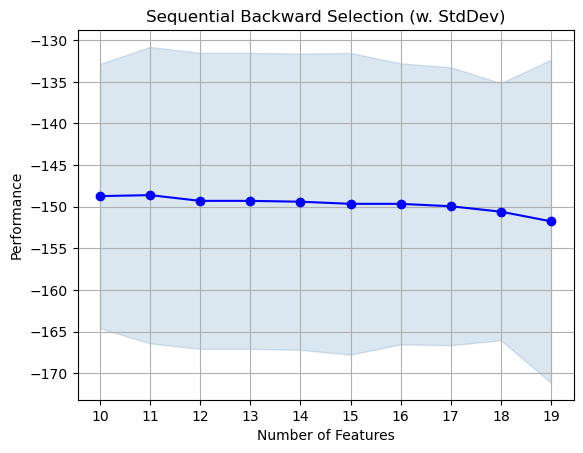

In [36]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

fig = plot_sfs(sfs_backward.get_metric_dict(), kind='std_dev')
plt.title('Sequential Backward Selection (w. StdDev)')
plt.grid()
plt.show()

In [39]:
preds = model.predict(X_test)
mse = mean_squared_error(y_test, preds)

mse = mean_squared_error(y_test, preds)
mae = mean_absolute_error(y_test, preds)
r2 = r2_score(y_test, preds)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared Score:", r2)

Mean Squared Error: 128.7095357284469
Mean Absolute Error: 9.106932060301975
R-squared Score: 0.5601780984927147


In [30]:
from sklearn.model_selection import RepeatedKFold

X_train = X_train[selected_features_backward]
X_test = X_test[selected_features_backward]

repeatkf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=None)

np.mean(cross_val_score(model, X_train, y_train, cv=repeatkf, n_jobs=-1))

0.5079640239188166

In [31]:
model.fit(X_train, y_train)
model_text = tree.export_text(model, feature_names=list(X_train.columns))
print(model_text)

|--- smoking_data <= 25.95
|   |--- smoking_data <= 21.55
|   |   |--- smoking_data <= 18.55
|   |   |   |--- Air_EQI <= 0.59
|   |   |   |   |--- value: [29.20]
|   |   |   |--- Air_EQI >  0.59
|   |   |   |   |--- value: [41.43]
|   |   |--- smoking_data >  18.55
|   |   |   |--- Air_EQI <= -0.55
|   |   |   |   |--- value: [37.44]
|   |   |   |--- Air_EQI >  -0.55
|   |   |   |   |--- value: [50.39]
|   |--- smoking_data >  21.55
|   |   |--- PM2.5 <= 8.39
|   |   |   |--- Water_EQI <= 0.08
|   |   |   |   |--- value: [59.44]
|   |   |   |--- Water_EQI >  0.08
|   |   |   |   |--- value: [52.75]
|   |   |--- PM2.5 >  8.39
|   |   |   |--- smoking_data <= 24.05
|   |   |   |   |--- value: [59.09]
|   |   |   |--- smoking_data >  24.05
|   |   |   |   |--- value: [64.95]
|--- smoking_data >  25.95
|   |--- smoking_data <= 32.55
|   |   |--- PM2.5 <= 8.66
|   |   |   |--- PM2.5 <= 6.08
|   |   |   |   |--- value: [54.86]
|   |   |   |--- PM2.5 >  6.08
|   |   |   |   |--- value: [66.81

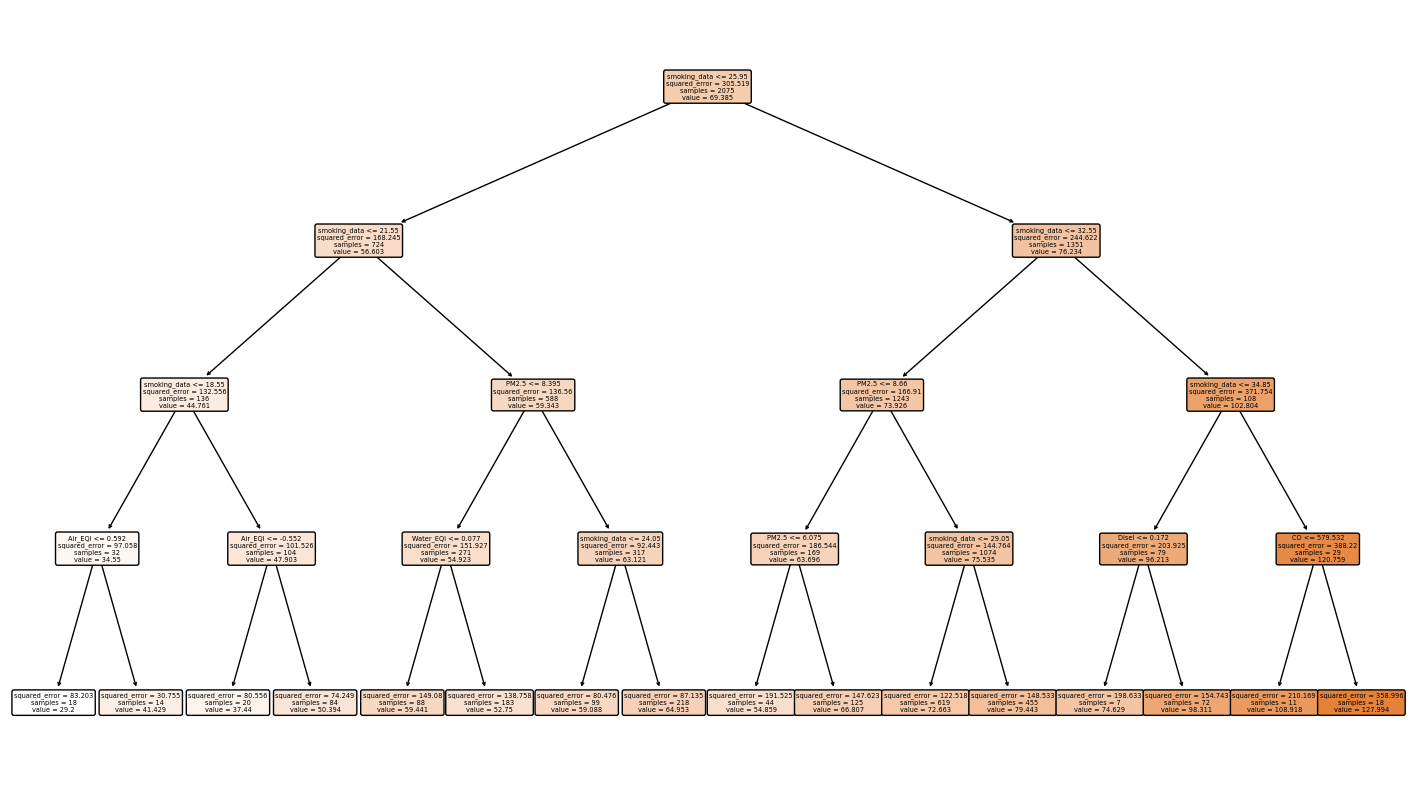

In [32]:
plt.figure(figsize=(18,10))
_ = tree.plot_tree(model, feature_names=X_train.columns.tolist(), filled=True, rounded=True)

Feature Importance:
PM2.5: 0.09516170730820915
CLU50_1: 0.0
PM10: 0.0
NO2: 0.0
O3: 0.0
CO: 0.0067682443979973726
Disel: 0.009747253184924134
Air_EQI: 0.01059222277412586
Water_EQI: 0.007247570557713403
smoking_data: 0.87048300177703


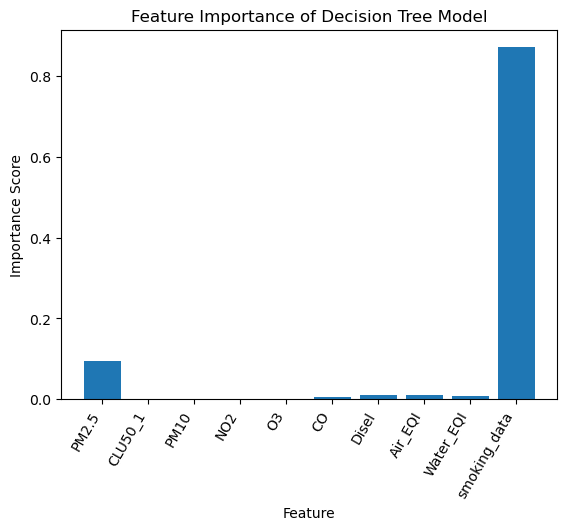

In [33]:
fi = model.feature_importances_

names = X_train.columns
importance_dict = dict(zip(names, fi))

print("Feature Importance:")
for feature, importance in importance_dict.items():
    print(f"{feature}: {importance}")

plt.bar(range(len(fi)), fi, tick_label=names)
plt.xlabel('Feature')
plt.xticks(rotation=60, ha='right')
plt.ylabel('Importance Score')
plt.title('Feature Importance of Decision Tree Model')
plt.show()

In [40]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': np.arange(5, 30, 5),
    'min_samples_split': [2, 5, 10, 15, 20]
}

grid_search = GridSearchCV(estimator=model, param_grid=params, cv=5, n_jobs=-1, verbose=1, scoring='neg_mean_absolute_error', return_train_score=True)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)

best_model = grid_search.best_estimator_
test_score = best_model.score(X_test, y_test)
print("Test set score of the best model:", test_score)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best parameters: {'max_depth': 5, 'min_samples_split': 20}
Test set score of the best model: 0.564735460968628


In [38]:
preds = best_model.predict(X_test)
mse = mean_squared_error(y_test, preds)

mse = mean_squared_error(y_test, preds)
mae = mean_absolute_error(y_test, preds)
r2 = r2_score(y_test, preds)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared Score:", r2)

Mean Squared Error: 127.37586860907236
Mean Absolute Error: 8.999024494802928
R-squared Score: 0.564735460968628
